# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(mouse_metadata, study_results, how ='right', on=["Mouse ID"])

# Display the data table for preview
combined_mouse_data = combined_mouse_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [111]:
# Checking the number of mice.
number_of_mice = len(combined_mouse_data["Mouse ID"].unique())
number_of_mice 

249

In [112]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_mice = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicates_mice

array(['g989'], dtype=object)

In [113]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = combined_mouse_data.loc[combined_mouse_data["Mouse ID"] == "g989", :]
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_dataframe = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mice)==False]
clean_mouse_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [114]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mouse_dataframe['Mouse ID'].value_counts()
clean_number_mice = len(clean_mice)
clean_number_mice

248

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_mean = clean_mouse_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_regimen_median = clean_mouse_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_regimen_variance = clean_mouse_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_regimen_standard_deviation = clean_mouse_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_regimen_sem = clean_mouse_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":drug_regimen_mean, 
                                    "Median Tumor Volume":drug_regimen_median, 
                                    "Tumor Volume Variance":drug_regimen_variance, 
                                    "Tumor Volume Std. Dev.":drug_regimen_standard_deviation, 
                                    "Tumor Volume Std. Err.":drug_regimen_sem})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation_statistics =  clean_mouse_dataframe.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

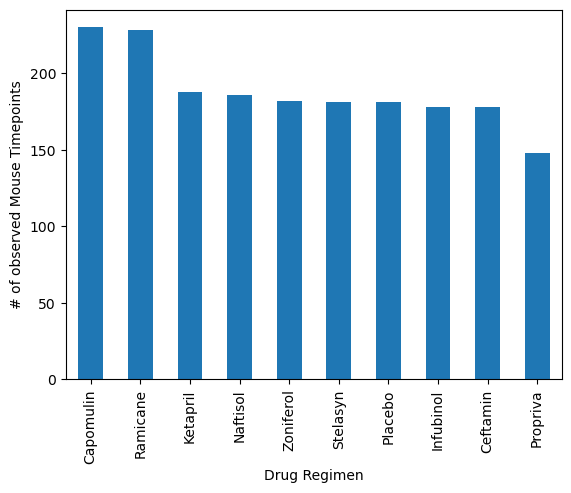

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_mice_count = clean_mouse_dataframe["Drug Regimen"].value_counts()
drug_bar_chart = total_mice_count.plot.bar(color='tab:blue')  

# Axis Display
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")


plt.show()

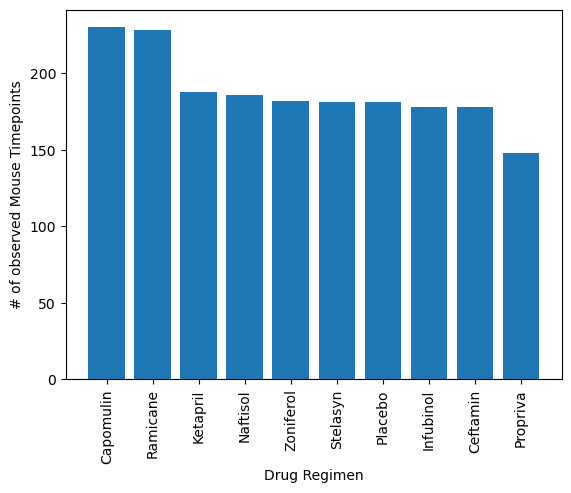

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = total_mice_count.index.values
y_axis = total_mice_count.values

# Creating a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=1, align='center')

# Setting the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation="vertical")


plt.show()

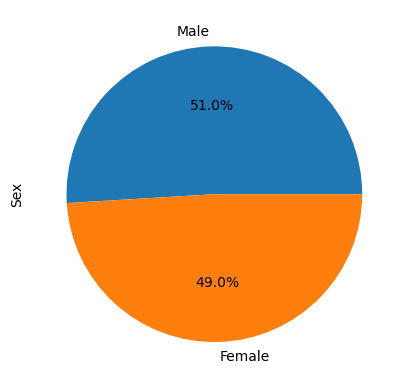

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_data = clean_mouse_dataframe["Sex"].value_counts()
mice_sex_data.plot.pie(autopct= "%1.1f%%")
plt.ylabel('Sex')
plt.show()

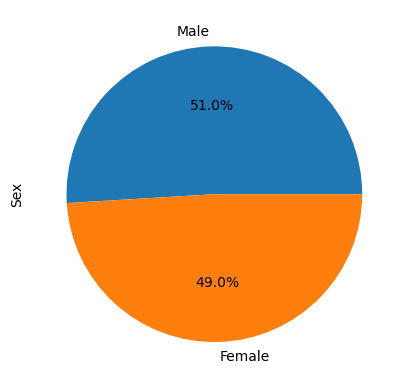

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
#sizes = [49.8989395, 50.700902]
plot = mice_sex_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_greatest_timepoint = combined_mouse_data.groupby(["Mouse ID"])["Timepoint"].max()
mouse_timepoint_reset = mouse_greatest_timepoint.reset_index()
    
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merged_data = mouse_timepoint_reset.merge(combined_mouse_data, on=["Mouse ID", "Timepoint"], how="left")
timepoint_merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
mice_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in mice_treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = timepoint_merged_data.loc[timepoint_merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor_volume.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


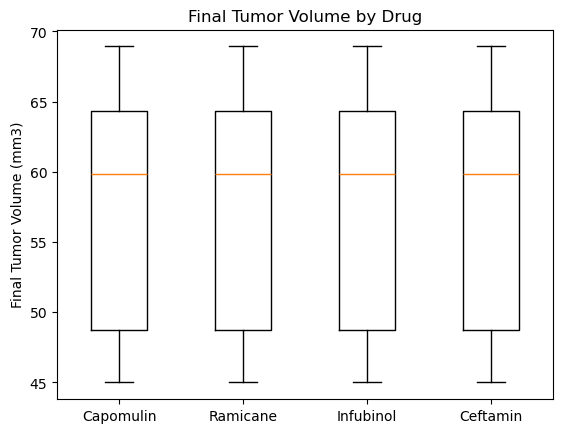

In [99]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(total_tumor_volume, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

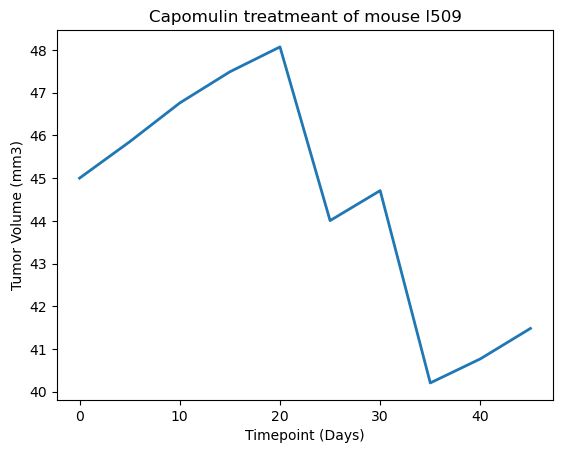

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# created a dataframe with specific mouse using the .loc() function and a boolean to find l509 data
lineplot_df = clean_mouse_dataframe.loc[clean_mouse_dataframe["Mouse ID"] == "l509",:]
lineplot_df
# defined the x axis list by calling the timepoints from the l509 dataframe
x_axis = lineplot_df["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumorsize = lineplot_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axis, tumorsize,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

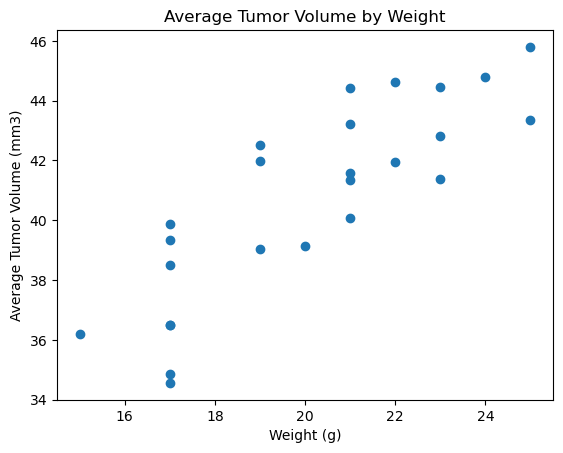

In [117]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Isolate cases that only use the Capomulin regimen
capomulin_df = combined_mouse_data.loc[combined_mouse_data['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_volume'})

# Merge average tumor volume onto data_df and drop duplicates
avg_volume_df = pd.merge(capomulin_df, avg_volume_df, on='Mouse ID')
final_avg_volume_df = avg_volume_df[['Weight (g)', 'avg_tumor_volume']].drop_duplicates()
final_avg_volume_df

x = final_avg_volume_df['Weight (g)']
y = final_avg_volume_df['avg_tumor_volume']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


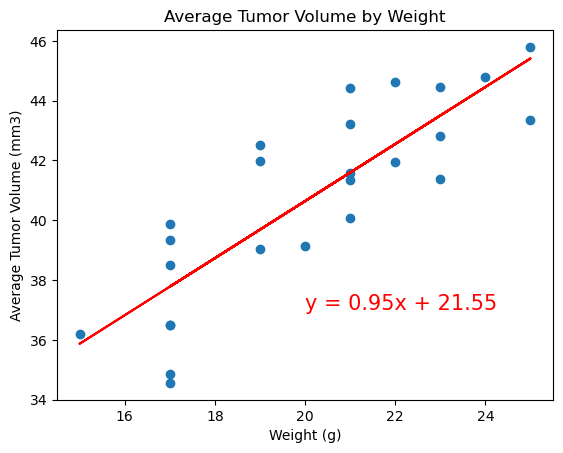

In [122]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coeff = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation_coeff[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()